In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import pandas as pd
import numpy as np  
from scipy.stats import rankdata
from scipy import stats
import sys

## Ranking across experiments

Load the time/pulsed experiments

In [4]:
# time_fast_decay_df = pd.read_csv('../dataframes/fast_decay_time_ranking.csv') # this isn't super relevant - we're not using it
time_medium_decay_df = pd.read_csv('../dataframes/medium_decay_time_ranking.csv')
time_slow_decay_df = pd.read_csv('../dataframes/slow_decay_time_ranking.csv')
print(time_medium_decay_df.shape)
time_medium_decay_df.head()

(23, 8)


,Unnamed: 0,intervention_name,algorithm,decay,total_cell_count,time_to_85,cell_count_rank,time_rank
0,EG_Ceramide_S1P_1_2,Ceramide->S1P=1,EG,2,199347.000000,672.0,9.0,15.0
1,EG_GAP_RAS_1_2,GAP->RAS=1,EG,2,652774.666667,1008.0,22.0,22.0
2,EG_IL15_GAP_0_2,IL15->GAP=0,EG,2,667846.000000,1092.0,23.0,23.0
3,EG_IL2RBT_IL2RB_0_2,IL2RBT->IL2RB=0,EG,2,633734.666667,612.0,19.0,12.5
4,EG_IL2RB_MCL1_0_2,IL2RB->MCL1=0,EG,2,609459.333333,576.0,17.0,11.0


Load the spatial experiment

In [5]:
space_cell_measure_ranking_df = pd.read_csv('../dataframes/spatial_cell_measures_rankings.csv')
print(space_cell_measure_ranking_df.shape)
space_cell_measure_ranking_df.head()
# space_cell_measure_ranking_df['steady_state_cell_count'].describe()

(23, 10)


,Unnamed: 0,Max cell count,Time at max cell count,Final cell count,Time to 85% population,total_cell_count,Time at max cell count rank,Final cell count rank,Time to 85% population rank,cell_count_rank
0,EG_Ceramide_S1P_1_11,1367,264.0,885,552.0,434617,19.5,20.5,15.0,18.0
1,EG_GAP_RAS_1_11,1373,300.0,884,720.0,443709,21.5,19.0,22.0,22.0
2,EG_IL15_GAP_0_11,1398,444.0,887,804.0,448976,23.0,23.0,23.0,23.0
3,EG_IL2RBT_IL2RB_0_11,1360,156.0,873,480.0,424360,12.0,3.5,12.0,11.0
4,EG_IL2RB_MCL1_0_11,1362,108.0,880,420.0,424725,10.5,12.5,11.0,12.0


Load the time and spatial experiment

In [6]:
# time_fast_clearance_df = pd.read_csv('../dataframes/fast_clearance_time_ranking.csv')
time_medium_clearance_df = pd.read_csv('../dataframes/medium_clearance_time_ranking.csv')
time_slow_clearance_df = pd.read_csv('../dataframes/slow_clearance_time_ranking.csv')

time_slow_clearance_df.sort_values(by='cell_count_rank', ascending=False).head(28)
# time_slow_clearance_df['steady_state_cell_count'].describe()

,Unnamed: 0,intervention_name,algorithm,decay,total_cell_count,time_to_85,cell_count_rank,time_rank
1,EG_GAP_RAS_1_3,GAP->RAS=1,EG,3,3.771477e+09,792.0,23.0,22.0
2,EG_IL15_GAP_0_3,IL15->GAP=0,EG,3,3.768458e+09,948.0,22.0,23.0
9,EG_RAS_MEK_0_3,RAS->MEK=0,EG,3,3.715457e+09,732.0,21.0,20.5
8,EG_PI3K_ERK_0_3,PI3K->ERK=0,EG,3,3.703113e+09,672.0,20.0,16.5
3,EG_IL2RBT_IL2RB_0_3,IL2RBT->IL2RB=0,EG,3,3.698196e+09,528.0,19.0,13.0
5,EG_JAK_STAT3_0_3,JAK->STAT3=0,EG,3,3.670596e+09,516.0,18.0,12.0
4,EG_IL2RB_MCL1_0_3,IL2RB->MCL1=0,EG,3,3.645838e+09,456.0,17.0,11.0
6,EG_MCL1_BID_0_3,MCL1->BID=0,EG,3,3.615161e+09,372.0,16.0,5.0
13,SM_anti_PDGFR_3,PDGFR=0,SM,3,3.584512e+09,732.0,15.0,20.5
7,EG_PDGFR_SPHK1_0_3,PDGFR->SPHK1=0,EG,3,3.581049e+09,684.0,14.0,18.0


AUC plots - medium decay/clearance

/Users/JohnMetzcar/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


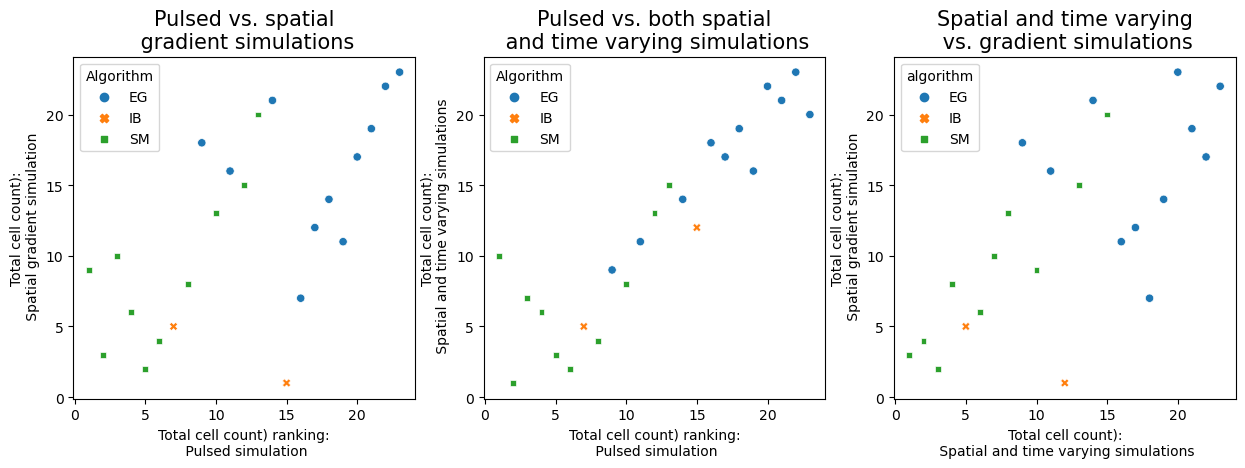

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
#0
sns.scatterplot(x=time_medium_decay_df['cell_count_rank'], y=space_cell_measure_ranking_df['cell_count_rank'], ax=ax[0], 
                style=time_medium_clearance_df['algorithm'], hue=time_medium_clearance_df['algorithm'])
ax[0].set_title('Pulsed vs. spatial\n gradient simulations', fontsize=15)
ax[0].set_xlabel('Total cell count) ranking:\n Pulsed simulation')
ax[0].set_ylabel('Total cell count):\n Spatial gradient simulation')
sns.move_legend(ax[0], "upper left", title="Algorithm") # this is setting the location also!!! Be aware!!
ax[0].set_aspect('equal')

#1
sns.scatterplot(x=time_medium_decay_df['cell_count_rank'], y=time_medium_clearance_df['cell_count_rank'], ax=ax[1], 
                style=time_medium_clearance_df['algorithm'], hue=time_medium_clearance_df['algorithm'])
ax[1].set_title('Pulsed vs. both spatial\n and time varying simulations', fontsize=15)
ax[1].set_xlabel('Total cell count) ranking:\n Pulsed simulation')
ax[1].set_ylabel('Total cell count):\n Spatial and time varying simulations')
sns.move_legend(ax[1], "upper left", title="Algorithm")
ax[1].set_aspect('equal')

#2
sns.scatterplot(time_medium_clearance_df['cell_count_rank'], space_cell_measure_ranking_df['cell_count_rank'], ax=ax[2],
              style=time_medium_clearance_df['algorithm'], hue=time_medium_clearance_df['algorithm'])
ax[2].set_title('Spatial and time varying\n vs. gradient simulations', fontsize=15)
ax[2].set_xlabel('Total cell count):\n Spatial and time varying simulations')
ax[2].set_ylabel('Total cell count):\n Spatial gradient simulation')
sns.move_legend(ax[1], "upper left", title="Algorithm")
ax[2].set_aspect('equal')
plt.savefig('../figures/medium_cell_count_rank_comparison.png')

## Timings SLOW

Reactivity correlations

In [15]:
correlation = stats.spearmanr(time_slow_decay_df['time_rank'], space_cell_measure_ranking_df['Time to 85% population rank'])
text = r'$\rho$ = ' + "{:.2g}".format(correlation[0]) + ', p = ' + "{:.2g}".format(correlation[1])
correlation = stats.spearmanr(time_slow_decay_df['time_rank'], time_slow_clearance_df['time_rank'])
correlation = stats.spearmanr(time_slow_clearance_df['time_rank'], space_cell_measure_ranking_df['Time to 85% population rank'])

text
# correlation

'$\\rho$ = 0.94, p = 4.3e-11'

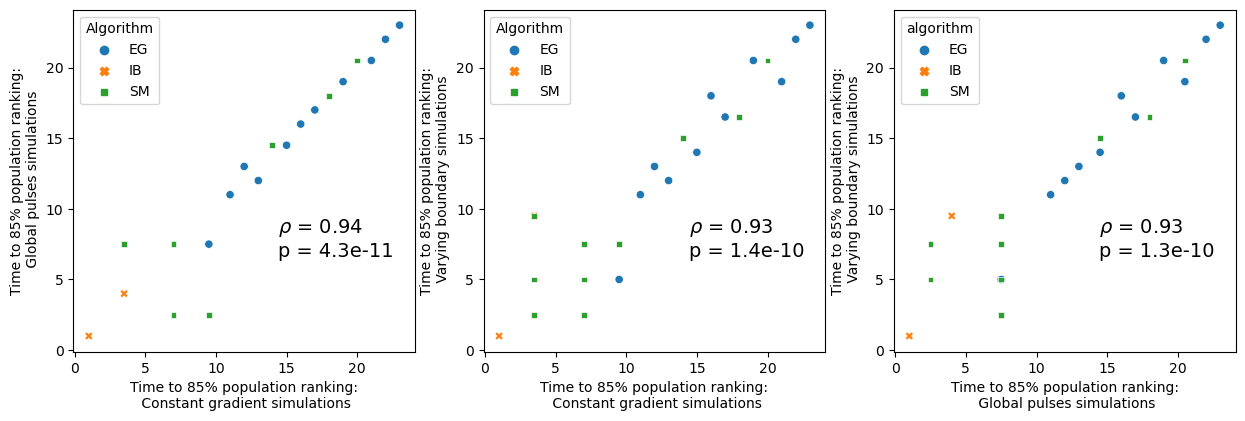

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
#0

sns.scatterplot(x=space_cell_measure_ranking_df['Time to 85% population rank'], y=time_slow_decay_df['time_rank'],  ax=ax[0], 
                style=time_slow_clearance_df['algorithm'], hue=time_slow_clearance_df['algorithm'])
# ax[0].set_title('Constant gradient vs.\n global pulses simulations', fontsize=15)
ax[0].set_xlabel('Time to 85% population ranking:\n Constant gradient simulations')
ax[0].set_ylabel('Time to 85% population ranking:\n Global pulses simulations')
sns.move_legend(ax[0], "upper left", title="Algorithm") # this is setting the location also!!! Be aware!!

correlation = stats.spearmanr( space_cell_measure_ranking_df['Time to 85% population rank'], time_slow_decay_df['time_rank'])
text = r'$\rho$ = ' + "{:.2g}".format(correlation[0]) + '\np = ' + "{:.2g}".format(correlation[1])
ax[0].text(0.60, 0.33, text, horizontalalignment='left',
     verticalalignment='center', fontsize=14, transform=ax[0].transAxes)

ax[0].set_aspect('equal')

#1
sns.scatterplot(x=space_cell_measure_ranking_df['Time to 85% population rank'], y=time_slow_clearance_df['time_rank'], ax=ax[1],
              style=time_slow_clearance_df['algorithm'], hue=time_slow_clearance_df['algorithm'])
# ax[1].set_title('Constant gradient vs.\n varying boundary simulations', fontsize=15)
ax[1].set_xlabel('Time to 85% population ranking:\n Constant gradient simulations')
ax[1].set_ylabel('Time to 85% population ranking:\n Varying boundary simulations')
sns.move_legend(ax[1], "upper left", title="Algorithm")

correlation = stats.spearmanr(space_cell_measure_ranking_df['Time to 85% population rank'], time_slow_clearance_df['time_rank'])
text = r'$\rho$ = ' + "{:.2g}".format(correlation[0]) + '\np = ' + "{:.2g}".format(correlation[1])
ax[1].text(0.60, 0.33, text, horizontalalignment='left',
     verticalalignment='center', fontsize=14, transform=ax[1].transAxes)

ax[1].set_aspect('equal')

#2
sns.scatterplot(x=time_slow_decay_df['time_rank'], y=time_slow_clearance_df['time_rank'], ax=ax[2], 
                style=time_slow_clearance_df['algorithm'], hue=time_slow_clearance_df['algorithm'])
# ax[2].set_title('Global pulses vs.\n varying boundary simulations', fontsize=15)
ax[2].set_xlabel('Time to 85% population ranking:\n Global pulses simulations')
ax[2].set_ylabel('Time to 85% population ranking:\n Varying boundary simulations')
sns.move_legend(ax[1], "upper left", title="Algorithm")

correlation = stats.spearmanr(time_slow_decay_df['time_rank'], time_slow_clearance_df['time_rank'])
text = r'$\rho$ = ' + "{:.2g}".format(correlation[0]) + '\np = ' + "{:.2g}".format(correlation[1])
ax[2].text(0.60, 0.33, text, horizontalalignment='left',
     verticalalignment='center', fontsize=14, transform=ax[2].transAxes)

ax[2].set_aspect('equal')

# text = r'$\rho$ = 0.69, p = 0.0026'

# 1 vs 2, 1 vs 3, 2 vs 3

# 1. constant gradient
# 2. global pulses
# 3. varying boundary


plt.savefig('../figures/time_to_percent_decline_rank_comparison_slow.png')

Cell count correlations

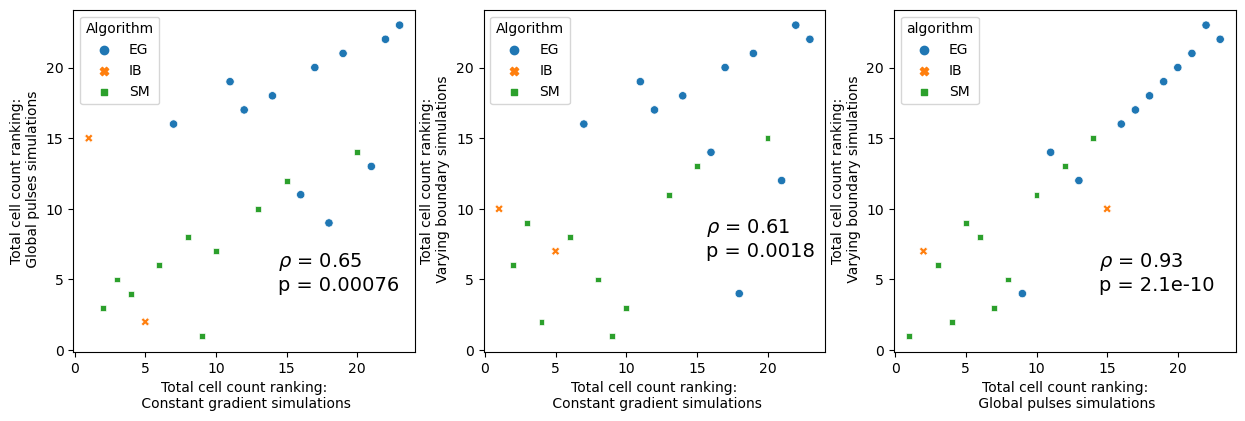

In [47]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
#0
sns.scatterplot(x=space_cell_measure_ranking_df['cell_count_rank'], y=time_slow_decay_df['cell_count_rank'],  ax=ax[0], 
                style=time_slow_clearance_df['algorithm'], hue=time_slow_clearance_df['algorithm'])
# ax[0].set_title('Constant gradient vs.\n global pulses simulations', fontsize=15)
ax[0].set_xlabel('Total cell count ranking:\n Constant gradient simulations')
ax[0].set_ylabel('Total cell count ranking:\n Global pulses simulations')
sns.move_legend(ax[0], "upper left", title="Algorithm") # this is setting the location also!!! Be aware!!

correlation = stats.spearmanr( space_cell_measure_ranking_df['cell_count_rank'], time_slow_decay_df['cell_count_rank'])
text = r'$\rho$ = ' + "{:.2g}".format(correlation[0]) + '\np = ' + "{:.2g}".format(correlation[1])
ax[0].text(0.60, 0.23, text, horizontalalignment='left',
     verticalalignment='center', fontsize=14, transform=ax[0].transAxes)

ax[0].set_aspect('equal')

#1
sns.scatterplot(x=space_cell_measure_ranking_df['cell_count_rank'], y=time_slow_clearance_df['cell_count_rank'], ax=ax[1],
              style=time_slow_clearance_df['algorithm'], hue=time_slow_clearance_df['algorithm'])
# ax[1].set_title('Constant gradient vs.\n varying boundary simulations', fontsize=15)
ax[1].set_xlabel('Total cell count ranking:\n Constant gradient simulations')
ax[1].set_ylabel('Total cell count ranking:\n Varying boundary simulations')
sns.move_legend(ax[1], "upper left", title="Algorithm")

correlation = stats.spearmanr(space_cell_measure_ranking_df['cell_count_rank'], time_slow_clearance_df['cell_count_rank'])
text = r'$\rho$ = ' + "{:.2g}".format(correlation[0]) + '\np = ' + "{:.2g}".format(correlation[1])
ax[1].text(0.65, 0.33, text, horizontalalignment='left',
     verticalalignment='center', fontsize=14, transform=ax[1].transAxes)

ax[1].set_aspect('equal')

#2
sns.scatterplot(x=time_slow_decay_df['cell_count_rank'], y=time_slow_clearance_df['cell_count_rank'], ax=ax[2], 
                style=time_slow_clearance_df['algorithm'], hue=time_slow_clearance_df['algorithm'])
# ax[2].set_title('Global pulses vs.\n varying boundary simulations', fontsize=15)
ax[2].set_xlabel('Total cell count ranking:\n Global pulses simulations')
ax[2].set_ylabel('Total cell count ranking:\n Varying boundary simulations')
sns.move_legend(ax[1], "upper left", title="Algorithm")

correlation = stats.spearmanr(time_slow_decay_df['cell_count_rank'], time_slow_clearance_df['cell_count_rank'])
text = r'$\rho$ = ' + "{:.2g}".format(correlation[0]) + '\np = ' + "{:.2g}".format(correlation[1])
ax[2].text(0.60, 0.23, text, horizontalalignment='left',
     verticalalignment='center', fontsize=14, transform=ax[2].transAxes)

ax[2].set_aspect('equal')

plt.savefig('../figures/cell_count_rank_comparison_slow.png')